# CSINTSY - Machine Learning Model
### Title: Machine Learning Analysis on Crop Recommendation

### Members: Cruzada, Escalona, Francisco, Loyola

### Section and Group CSINTSY S14 MCO5

## ML Methods Used

The machine learning methods used are ones that are capable of multi-label classification techniques. This is for the reason that the dataset labels the different combination of environmental parameters to an appropriate type of crop of different kinds (i.e., multiple labels). Among the techniques used are the following:
1. K-Nearest Neighbor Classifier
2. Decision Tree Classifier
3. Logistic Regression

# Experiment Proper

## 1. Importing and cleaning data.

### 1.1 Import necessary libraries and create utility variables

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.model_selection as model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import svm

timers = []

### 1.2 Load Raw Data

The training data shows 8 unique columns which represent certain parameters. With the exception of the `label` parameter, these parameters are the environmental variables that are required in the growth of a certain crop which are the levels of `nitrogen`, `phosphorus`, `potassium`, `temperature` (in C), `humidity`, `ph`, and `rainfall`.

In [2]:
# Load Training data
crops_df = pd.read_csv('crops_dataset.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#### 1.2.1 Check for missing data

In [3]:
crops_df.isnull().any()

nitrogen       False
phosphorus     False
potassium      False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

#### 1.2.2 Check for duplicate data

In [4]:
crops_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

#### 1.2.3 Check for incorrect datatype

In [5]:
crops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### 1.2.4 Determine Features

In [6]:
# Get the feature matrix 
features = ['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']
X = crops_df[features].to_numpy()

#### 1.2.5 Determine Unique Crop Labels

In [7]:
#Determine the list of unique crops
y = crops_df['label'].to_numpy()
labels = crops_df["label"].unique()
print("No. of unique crop labels: ", labels.size)
print(labels)

No. of unique crop labels:  22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


### 1.3 Divide Training Data from Test Data

With a original dataset having 2200 rows or data points, the data split will be 80% training data and 20% test data for a mixture of 1760:440 of training and test data.

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20, random_state=1)

### 1.4 Exploratory Data Analysis

#### 1.4.1 Nitrogen, Phosphorus, Potassium Relationship

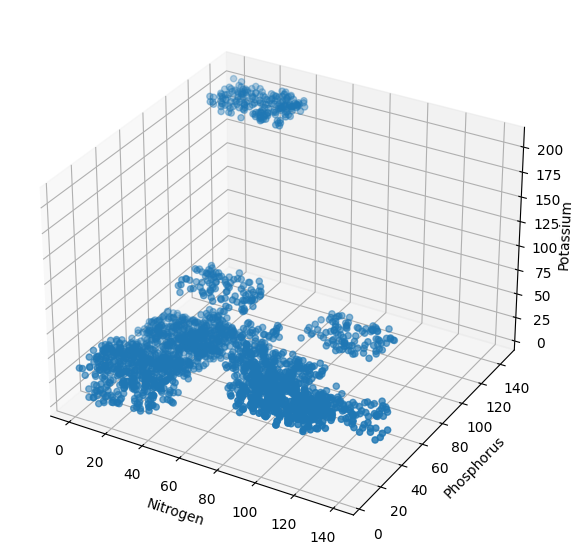

In [9]:
nppr_graph = plt.figure(figsize=(10,7))
nppr_graph_ax = plt.axes(projection='3d')
nppr_graph_ax.scatter3D(crops_df['nitrogen'],crops_df['phosphorus'], crops_df['potassium'])
nppr_graph_ax.set_xlabel('Nitrogen')
nppr_graph_ax.set_ylabel('Phosphorus')
nppr_graph_ax.set_zlabel('Potassium')
nppr_graph_ax.zaxis.labelpad=-0.5 # to see z label
plt.show()

#### 1.4.2 Temperature, Humidity, Rainfall Relationship

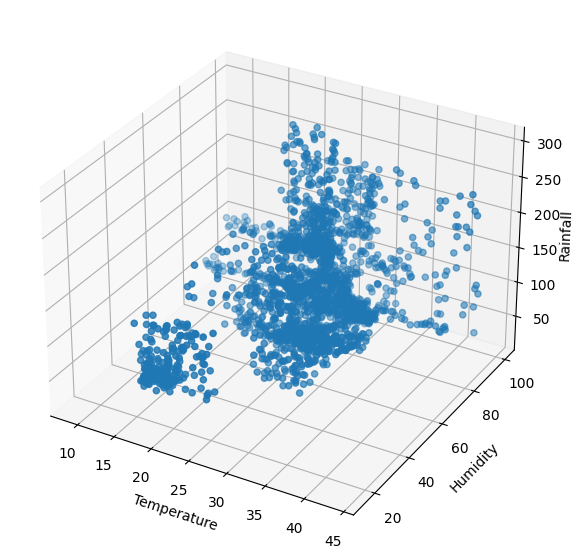

In [10]:
thrr_graph = plt.figure(figsize=(10,7))
thrr_graph_ax = plt.axes(projection='3d')
thrr_graph_ax.scatter3D(crops_df['temperature'],crops_df['humidity'], crops_df['rainfall'])
thrr_graph_ax.set_xlabel('Temperature')
thrr_graph_ax.set_ylabel('Humidity')
thrr_graph_ax.set_zlabel('Rainfall')
thrr_graph_ax.zaxis.labelpad=-0.5 # to see z label
plt.show()

#### 1.4.3 Temperature, Humidity, pH Relationship

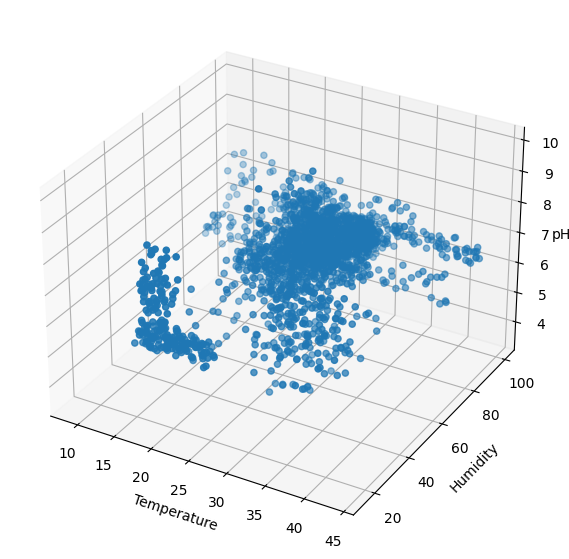

In [11]:
thpr_graph = plt.figure(figsize=(10,7))
thrp_graph_ax = plt.axes(projection='3d')
thrp_graph_ax.scatter3D(crops_df['temperature'],crops_df['humidity'], crops_df['ph'])
thrp_graph_ax.set_xlabel('Temperature')
thrp_graph_ax.set_ylabel('Humidity')
thrp_graph_ax.set_zlabel('pH')
thrp_graph_ax.zaxis.labelpad=-2.2# to see z label
plt.show()

#### 1.4.4 Data Distribution

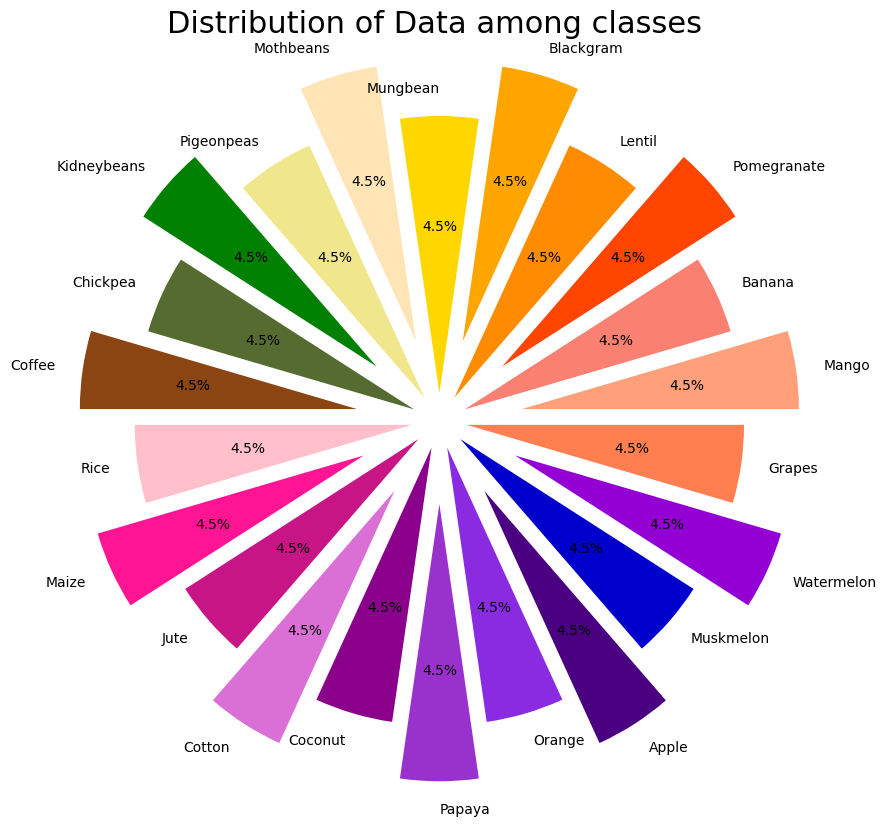

In [12]:
#Pie chart for data distribution
df_for_graph = crops_df.label.value_counts().reset_index()
df_for_graph['index'] = df_for_graph['index'].str.capitalize()
#df_for_graph

colors = ['#FFC0CB', '#FF1493', '#C71585', '#DA70D6', '#8B008B', '#9932CC', '#8A2BE2', '#4B0082', '#0000CD', '#9400D3', 
          '#FF7F50', '#FFA07A', '#FA8072', '#FF4500', '#FF8C00', '#FFA500', '#FFD700', '#FFE4B5', '#F0E68C', '#008000', 
          '#556B2F', '#8B4513']
explode = (0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3, 0.1, 0.3)
ax = plt.figure(figsize=(10,9))
plt.pie(df_for_graph['label'], labels=df_for_graph['index'], colors=colors, explode=explode, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Data among classes \n', size=22)
plt.show()

#### 1.4.5 Mean Nitrogen Needs by Crop

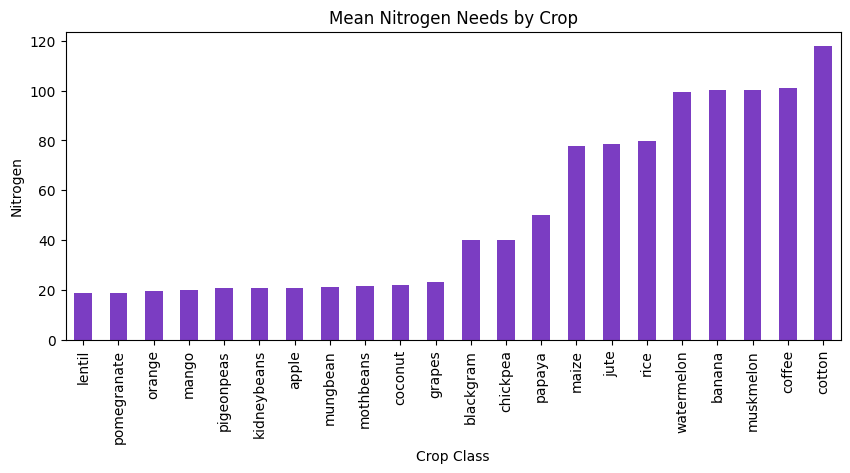

In [13]:
crop_nitrogen =  crops_df.groupby('label')['nitrogen'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_nitrogen.plot(kind='bar', ax=ax, color='#7B3DC2')
ax.set_xlabel('Crop Class')
ax.set_ylabel('Nitrogen')
ax.set_title('Mean Nitrogen Needs by Crop')
plt.show()

#### 1.4.6 Mean Phosphorus Needs by Crop

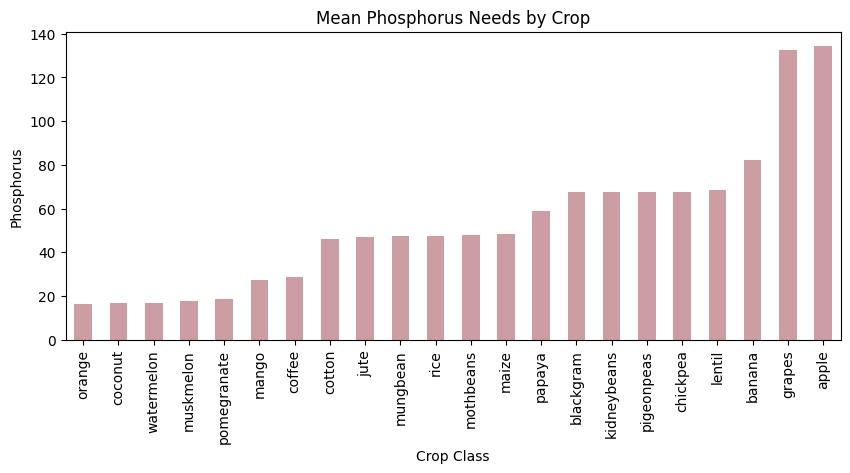

In [14]:
crop_phosphorus =  crops_df.groupby('label')['phosphorus'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_phosphorus.plot(kind='bar', ax=ax, color='#CC9EA4')
ax.set_xlabel('Crop Class')
ax.set_ylabel('Phosphorus')
ax.set_title('Mean Phosphorus Needs by Crop')
plt.show()

#### 1.4.7 Mean Potassium Needs by Crop

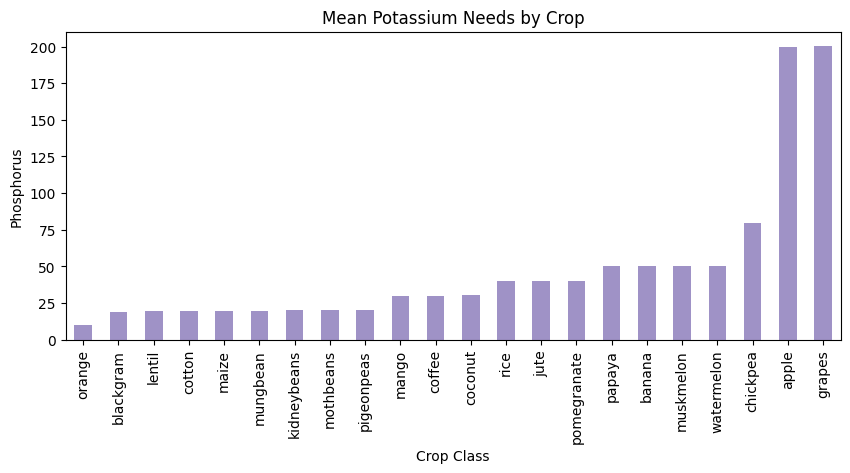

In [15]:
crop_potassium =  crops_df.groupby('label')['potassium'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_potassium.plot(kind='bar', ax=ax, color='#9F92C6')
ax.set_xlabel('Crop Class')
ax.set_ylabel('Phosphorus')
ax.set_title('Mean Potassium Needs by Crop')
plt.show()

#### 1.4.8 Mean Temperature Needs by Crop

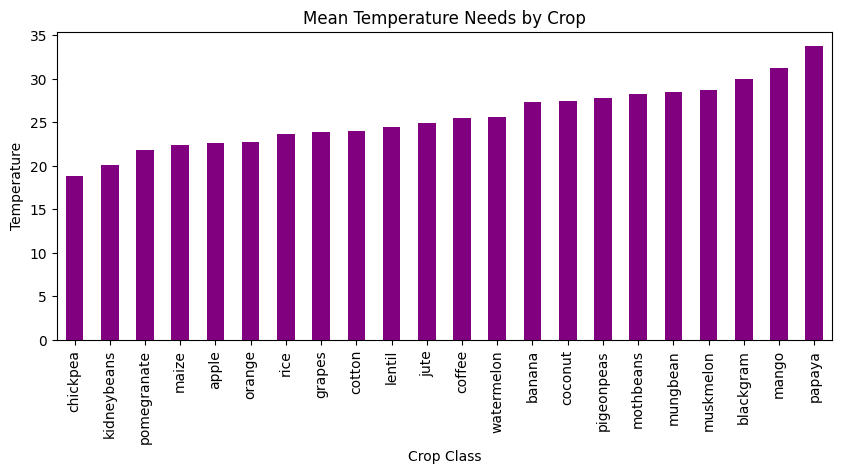

In [16]:
crop_temp =  crops_df.groupby('label')['temperature'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_temp.plot(kind='bar', ax=ax, color='purple')
ax.set_xlabel('Crop Class')
ax.set_ylabel('Temperature')
ax.set_title('Mean Temperature Needs by Crop')
plt.show()

#### 1.4.9 Mean Humidity Needs by Crop

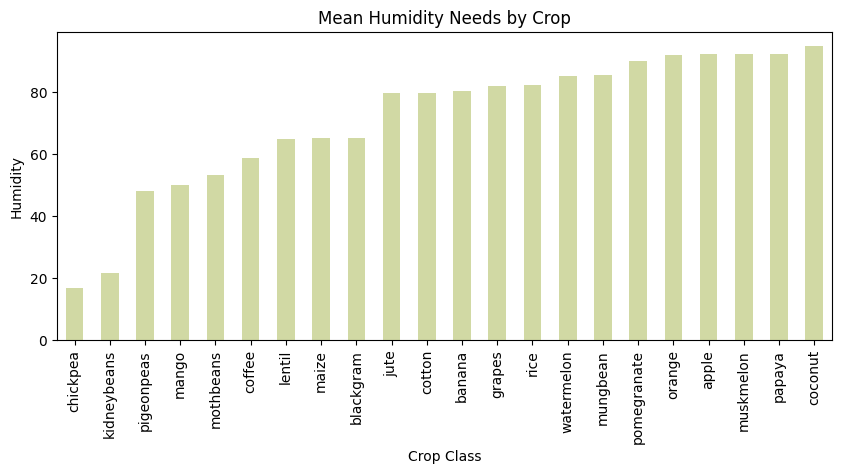

In [17]:
crop_humidity =  crops_df.groupby('label')['humidity'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_humidity.plot(kind='bar', ax=ax, color='#D1D9A4')
ax.set_xlabel('Crop Class')
ax.set_ylabel('Humidity')
ax.set_title('Mean Humidity Needs by Crop')
plt.show()

#### 1.4.10 Mean pH Needs by Crop

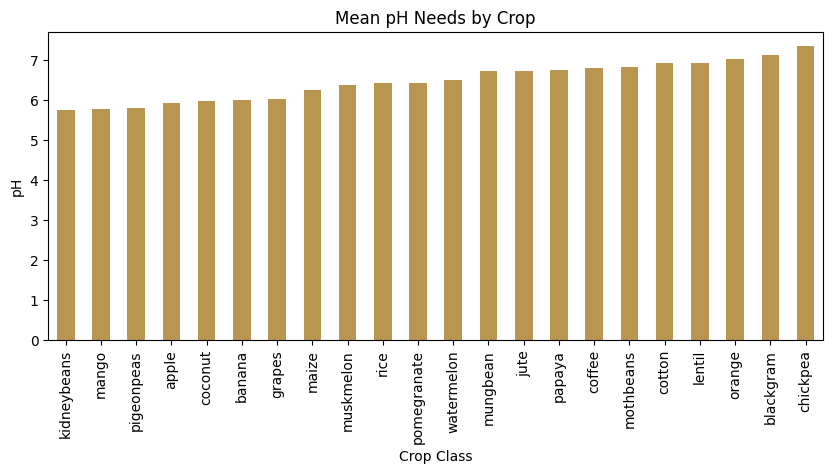

In [18]:
crop_pH =  crops_df.groupby('label')['ph'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_pH.plot(kind='bar', ax=ax, color='#B99650')
ax.set_xlabel('Crop Class')
ax.set_ylabel('pH')
ax.set_title('Mean pH Needs by Crop')
plt.show()

#### 1.4.11 Mean Rainfall Needs by Crop

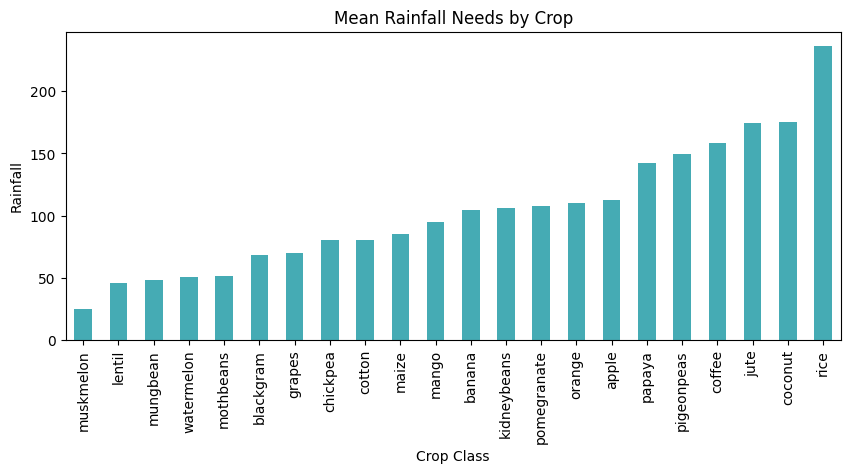

In [19]:
crop_rainfall =  crops_df.groupby('label')['rainfall'].mean().sort_values()

fig,ax = plt.subplots(figsize=(10, 4))
crop_rainfall.plot(kind='bar', ax=ax, color='#45ABB4')
ax.set_xlabel('Crop Class')
ax.set_ylabel('Rainfall')
ax.set_title('Mean Rainfall Needs by Crop')
plt.show()

## 2. Use of Machine Learning

### 2.1 K-Nearest Neighbor (KNN) Classifier

#### 2.1.2 Load and 'Train' K Neighbors Classifier Model

In [20]:
knn = KNeighborsClassifier() #default: neighbors = 5, p = 2, leaf size = 30
startTime = time.time()
knn.fit(X,y)
timers.append(["KNN Default: ", time.time()-startTime])

#### 2.1.3 Test Predictions

In [21]:
y_pred = knn.predict(X_test)

#### 2.1.4 Create Classifier Report

In [22]:
knn_cr = classification_report(y_test, y_pred, digits=4)

#### 2.1.5 K-NN Confusion Matrix

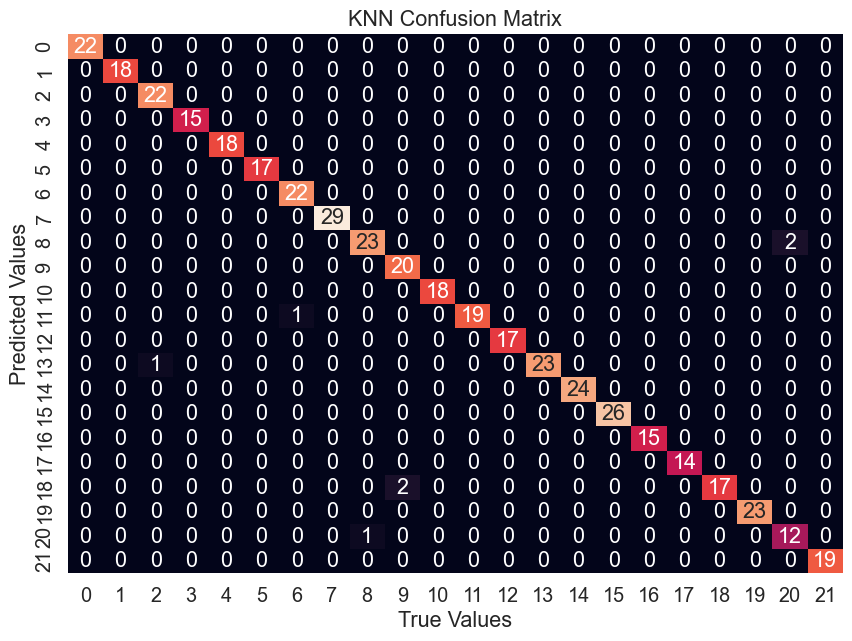

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
knn_conf_matrix = classification_report(y_test,y_pred, digits=4)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("KNN Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

### 2.2 Decision Trees Classifier

#### 2.2.2 Load and 'Train' Decision Tree Classifier Model

In [24]:
dtc = DecisionTreeClassifier() #default: no max depth
startTime = time.time()
dtc.fit(X,y)
timers.append(["DTC Default: ", time.time()-startTime])

#### 2.2.4 Plot Decision Tree

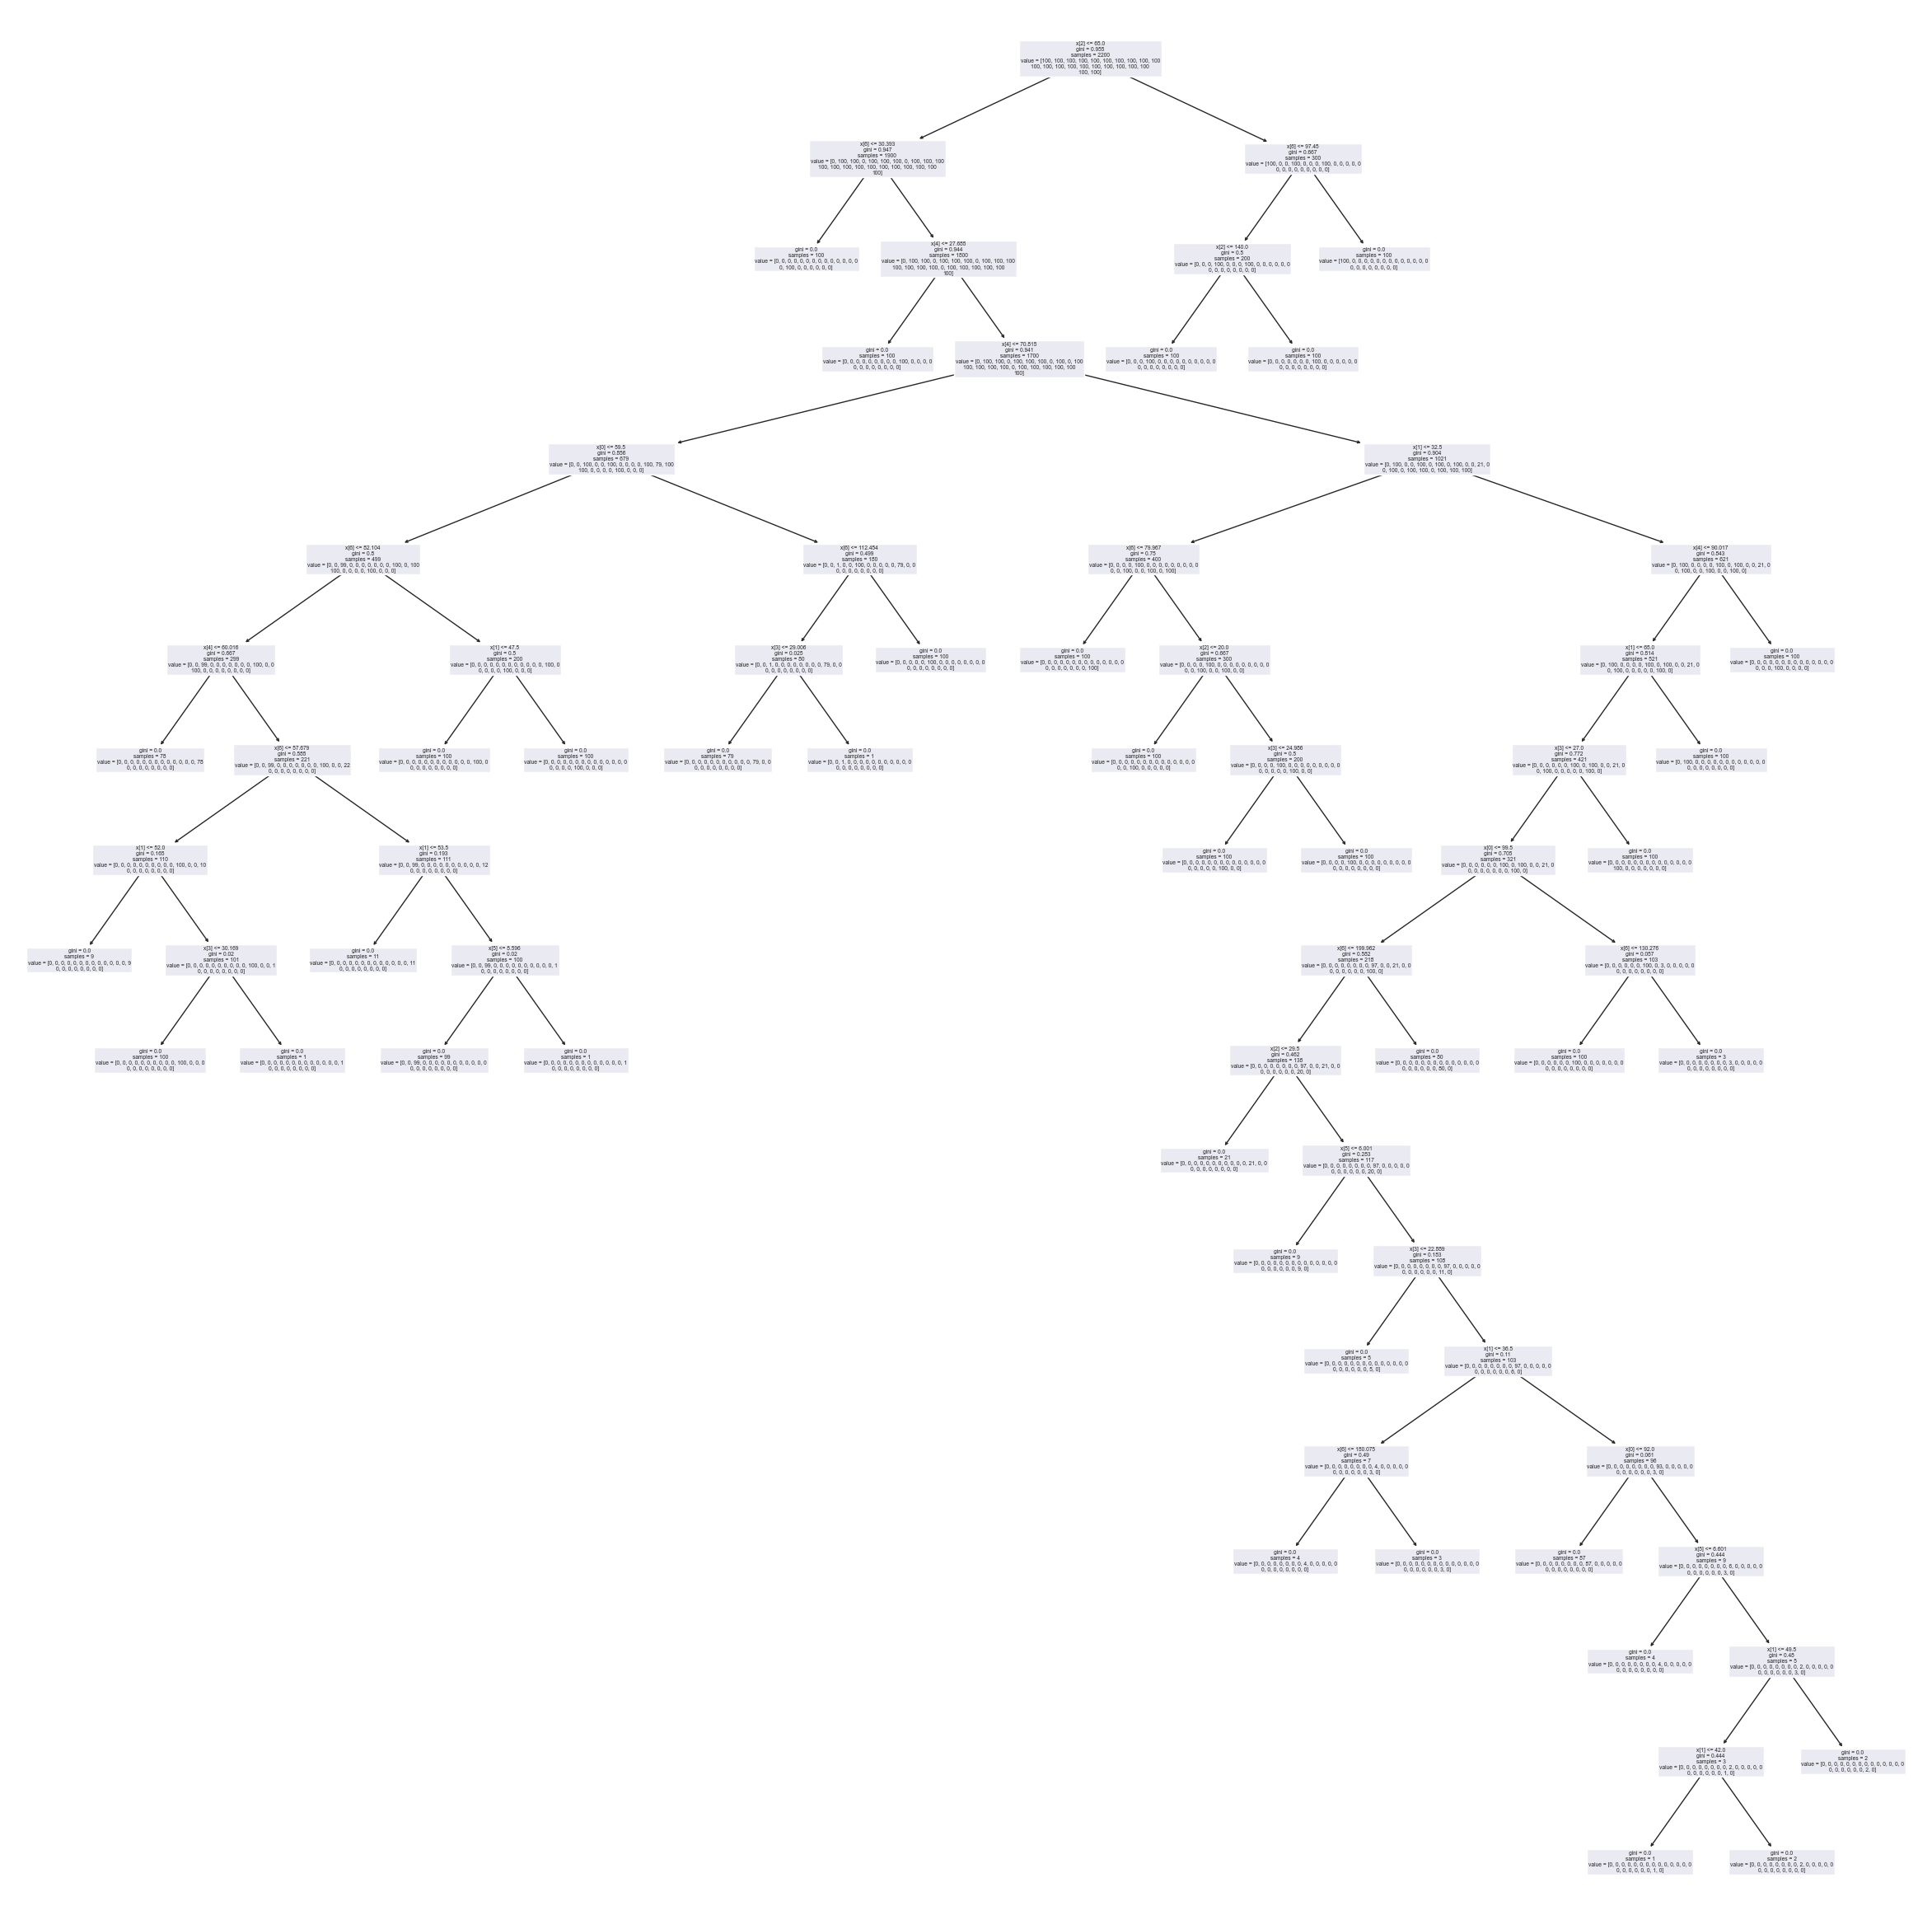

In [25]:
plt.figure(figsize=(30, 30))
plot_tree(dtc)
plt.show()

#### 2.2.3 Test Predictions

In [26]:
y_pred = dtc.predict(X_test)

#### 2.2.4 Create Classifier Report

In [27]:
dtc_cr = classification_report(y_test, y_pred, digits=4)

#### 2.2.5 DTC Confusion Matrix

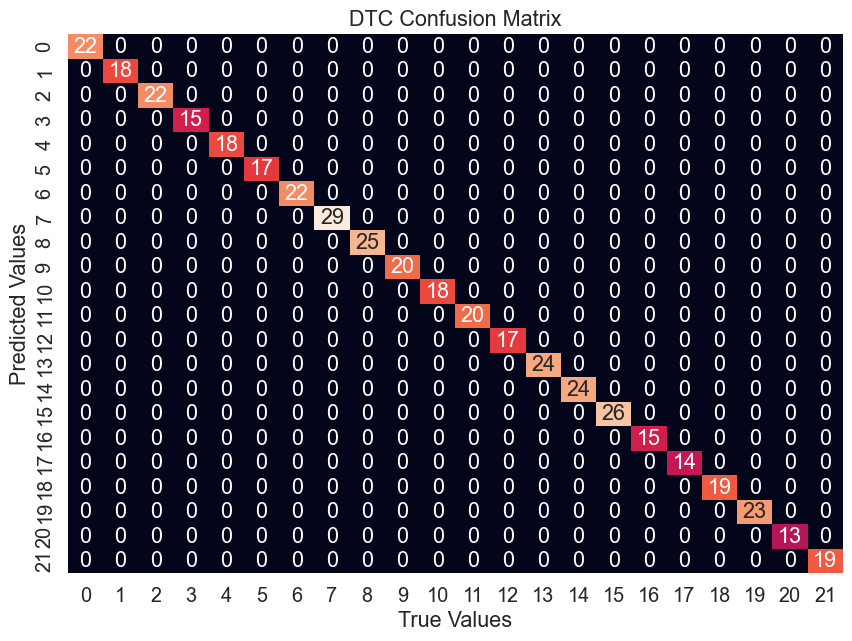

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
dtc_conf_matrix = classification_report(y_test,y_pred, digits=4)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("DTC Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

### 2.3 Logistic Regression Classifier

#### 2.3.1 Load and 'Train' Logistic Regression Classifier Model

In [29]:
lr_model = LogisticRegression(penalty=None, verbose=True, n_jobs=-1, random_state=1, max_iter=10000) #default: solver = lbfgs
startTime = time.time()
lr_model.fit(X, y)
timers.append(["LR Default: ", time.time()-startTime])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.1s finished


#### 2.3.2 Test Predictions 

In [30]:
y_pred = lr_model.predict(X_test)

#### 2.3.3 Create Classification Report

In [31]:
lr_cr = classification_report(y_test, y_pred, digits=4)

#### LR Confusion Matrix

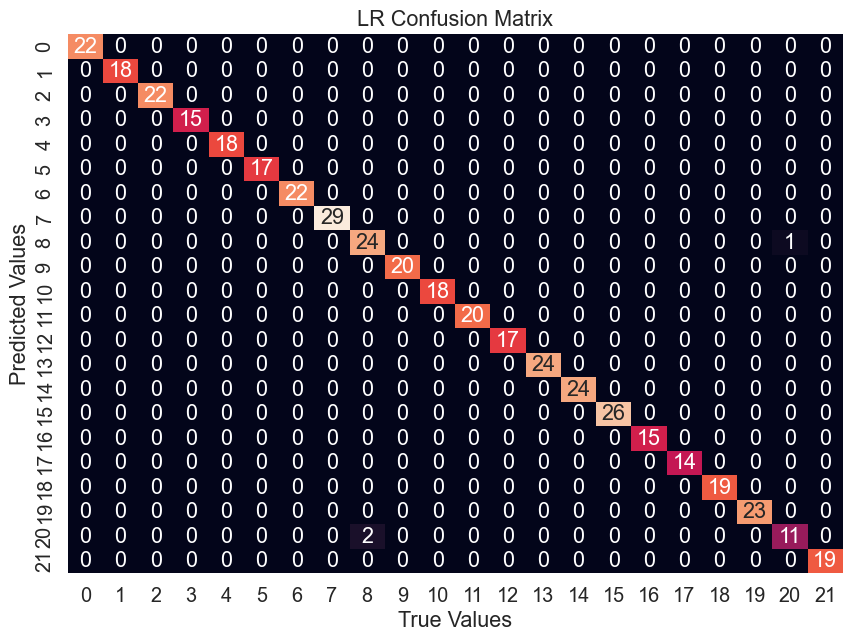

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
lr_conf_matrix = classification_report(y_test,y_pred, digits=4)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("LR Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# 3. Comparison of Machine Learning Models

#### 3.1 Using SkLearn's Classifier Report

In [33]:
print("KNN")
print(knn_cr)
print("DTC")
print(dtc_cr)
print("LR")
print(lr_cr)

KNN
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        22
      banana     1.0000    1.0000    1.0000        18
   blackgram     0.9565    1.0000    0.9778        22
    chickpea     1.0000    1.0000    1.0000        15
     coconut     1.0000    1.0000    1.0000        18
      coffee     1.0000    1.0000    1.0000        17
      cotton     0.9565    1.0000    0.9778        22
      grapes     1.0000    1.0000    1.0000        29
        jute     0.9583    0.9200    0.9388        25
 kidneybeans     0.9091    1.0000    0.9524        20
      lentil     1.0000    1.0000    1.0000        18
       maize     1.0000    0.9500    0.9744        20
       mango     1.0000    1.0000    1.0000        17
   mothbeans     1.0000    0.9583    0.9787        24
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.0000        26
      orange     1.0000    1.0000    1.0000        15
      papaya     1.0000

#### 3.2 Using Confusion Matrix

In [34]:
print("KNN Confusion Matrix")
print(knn_conf_matrix)
print("DTC Confusion Matrix")
print(dtc_conf_matrix)
print("LR Confusion Matrix")
print(lr_conf_matrix)

KNN Confusion Matrix
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        22
      banana     1.0000    1.0000    1.0000        18
   blackgram     0.9565    1.0000    0.9778        22
    chickpea     1.0000    1.0000    1.0000        15
     coconut     1.0000    1.0000    1.0000        18
      coffee     1.0000    1.0000    1.0000        17
      cotton     0.9565    1.0000    0.9778        22
      grapes     1.0000    1.0000    1.0000        29
        jute     0.9583    0.9200    0.9388        25
 kidneybeans     0.9091    1.0000    0.9524        20
      lentil     1.0000    1.0000    1.0000        18
       maize     1.0000    0.9500    0.9744        20
       mango     1.0000    1.0000    1.0000        17
   mothbeans     1.0000    0.9583    0.9787        24
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.0000        26
      orange     1.0000    1.0000    1.0000        15
      

#### 3.3 Using K-Folds Cross Validation comparision for ML Algorithms

In [35]:
#Default parameters only
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lr_model = LogisticRegression(penalty=None, verbose=True, n_jobs=-1)

# kf will return list of indices for the train_index and test_index
kfold_results = []
for i, (train_index, test_index) in enumerate(kf.split(crops_df)):
    axis = 0 
    # Extract from the dataframe based on the given indeces
    training_set = np.take(X, train_index, axis)
    training_set_labels = np.take(y, train_index, axis)
    test_set = np.take(X, test_index, axis)
    test_set_labels = np.take(y, test_index, axis)

    knn.fit(training_set,training_set_labels)
    knn_pred = knn.predict(test_set)
    knn_accuracy = round(accuracy_score(test_set_labels, knn_pred),4)
    
    dtc.fit(training_set,training_set_labels)
    dtc_pred = dtc.predict(test_set)
    dtc_accuracy = round(accuracy_score(test_set_labels, dtc_pred),4)
    
    lr_model.fit(training_set,training_set_labels)
    lr_pred = lr_model.predict(test_set)
    lr_accuracy = round(accuracy_score(test_set_labels, lr_pred),4)                
    
    kfold_results.append([i, knn_accuracy, dtc_accuracy, lr_accuracy])

print("============================")
print("Fold  |  KNN  |  DTC |  LR  ")
print("============================")
for k in kfold_results:
    print((str)(k[0]).center(5),"|",(str)(k[1].round(4)).ljust(5),"|",(str)(k[2].round(4)).ljust(5),"|",(str)(k[3].round(4)).ljust(5))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

Fold  |  KNN  |  DTC |  LR  
  0   | 0.9818 | 0.9818 | 0.9682
  1   | 0.9818 | 0.9909 | 0.9636
  2   | 0.9773 | 0.9909 | 0.9591
  3   | 0.9727 | 0.9909 | 0.9682
  4   | 0.9818 | 0.9727 | 0.9591
  5   | 0.9818 | 0.9955 | 0.9727
  6   | 0.9909 | 0.9909 | 0.9591
  7   | 0.9773 | 0.9818 | 0.9409
  8   | 0.9727 | 0.9864 | 0.9455
  9   | 0.9818 | 1.0   | 0.9818


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


## 4. Hyperparameter Tuning 

Re-establishing data to use

In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20, random_state=1)

### 4.1 K-Nearest Neighbor (KNN) Classifier - Fine Tuning

#### 4.1.1 Finding Best K Value

In [37]:
k_values = [i for i in range (1,26)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10)
    print('k=' + str(k) + ': ' + str(np.mean(score)))

k=1: 0.9804545454545457
k=2: 0.975
k=3: 0.9804545454545457
k=4: 0.9790909090909092
k=5: 0.9795454545454547
k=6: 0.9795454545454545
k=7: 0.9795454545454547
k=8: 0.9777272727272728
k=9: 0.9772727272727273
k=10: 0.975909090909091
k=11: 0.9754545454545454
k=12: 0.9754545454545454
k=13: 0.9754545454545454
k=14: 0.974090909090909
k=15: 0.9745454545454546
k=16: 0.9727272727272727
k=17: 0.9754545454545456
k=18: 0.9722727272727271
k=19: 0.9718181818181819
k=20: 0.97
k=21: 0.9704545454545455
k=22: 0.97
k=23: 0.9704545454545455
k=24: 0.9704545454545455
k=25: 0.9695454545454545


#### 4.1.2 Load and Train Fine Tuned KNN

In [38]:
knn_v2 = KNeighborsClassifier(n_neighbors=3)
startTime = time.time()
knn_v2.fit(X,y)
timers.append(["KNN Fine-Tuned: ", time.time()-startTime])

#### 4.1.3 Test Predictions

In [39]:
y_pred = knn_v2.predict(X_test)

#### 4.1.4 Create Classification Report

In [40]:
knn_cr_v2 = classification_report(y_test, y_pred, digits=4)

#### 4.1.5 KNN (Fine Tuned) Confusion Matrix

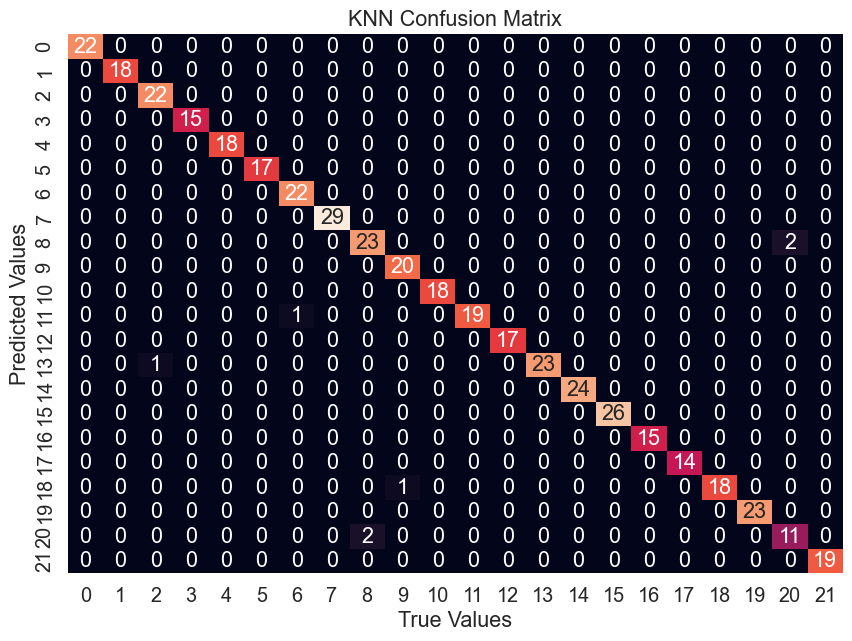

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
knn_conf_matrix = classification_report(y_test,y_pred, digits=4)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("KNN Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

### 4.2 Decision Trees Classifier

#### 4.2.1 Finding Best Tree Depth

In [42]:
d_values = [i for i in range (1,26)]
scores = []

for d in d_values:
    dct = DecisionTreeClassifier(max_depth=d)
    score = cross_val_score(dct, X, y, cv=10)
    print('Depth=' + str(d) + ': ' + str(np.mean(score)))

Depth=1: 0.09090909090909091
Depth=2: 0.1772727272727273
Depth=3: 0.2545454545454545
Depth=4: 0.31363636363636366
Depth=5: 0.38136363636363635
Depth=6: 0.5463636363636363
Depth=7: 0.7472727272727273
Depth=8: 0.8686363636363635
Depth=9: 0.9463636363636363
Depth=10: 0.975909090909091
Depth=11: 0.9886363636363636
Depth=12: 0.9918181818181818
Depth=13: 0.990909090909091
Depth=14: 0.9886363636363636
Depth=15: 0.9913636363636364
Depth=16: 0.9904545454545455
Depth=17: 0.9918181818181818
Depth=18: 0.990909090909091
Depth=19: 0.990909090909091
Depth=20: 0.9904545454545455
Depth=21: 0.9913636363636364
Depth=22: 0.9895454545454545
Depth=23: 0.9918181818181818
Depth=24: 0.99
Depth=25: 0.9904545454545455


#### 4.2.2 Load and Train Fine Tuned DTC

In [43]:
dtc_v2 = DecisionTreeClassifier(max_depth=13)
startTime = time.time()
dtc_v2.fit(X,y)
timers.append(["DTC Fine-Tuned: ", time.time()-startTime])

#### 4.2.3 Test Predictions

In [44]:
y_pred = dtc_v2.predict(X_test)

#### 4.2.4 Plot Fine-Tuned Decision Tree

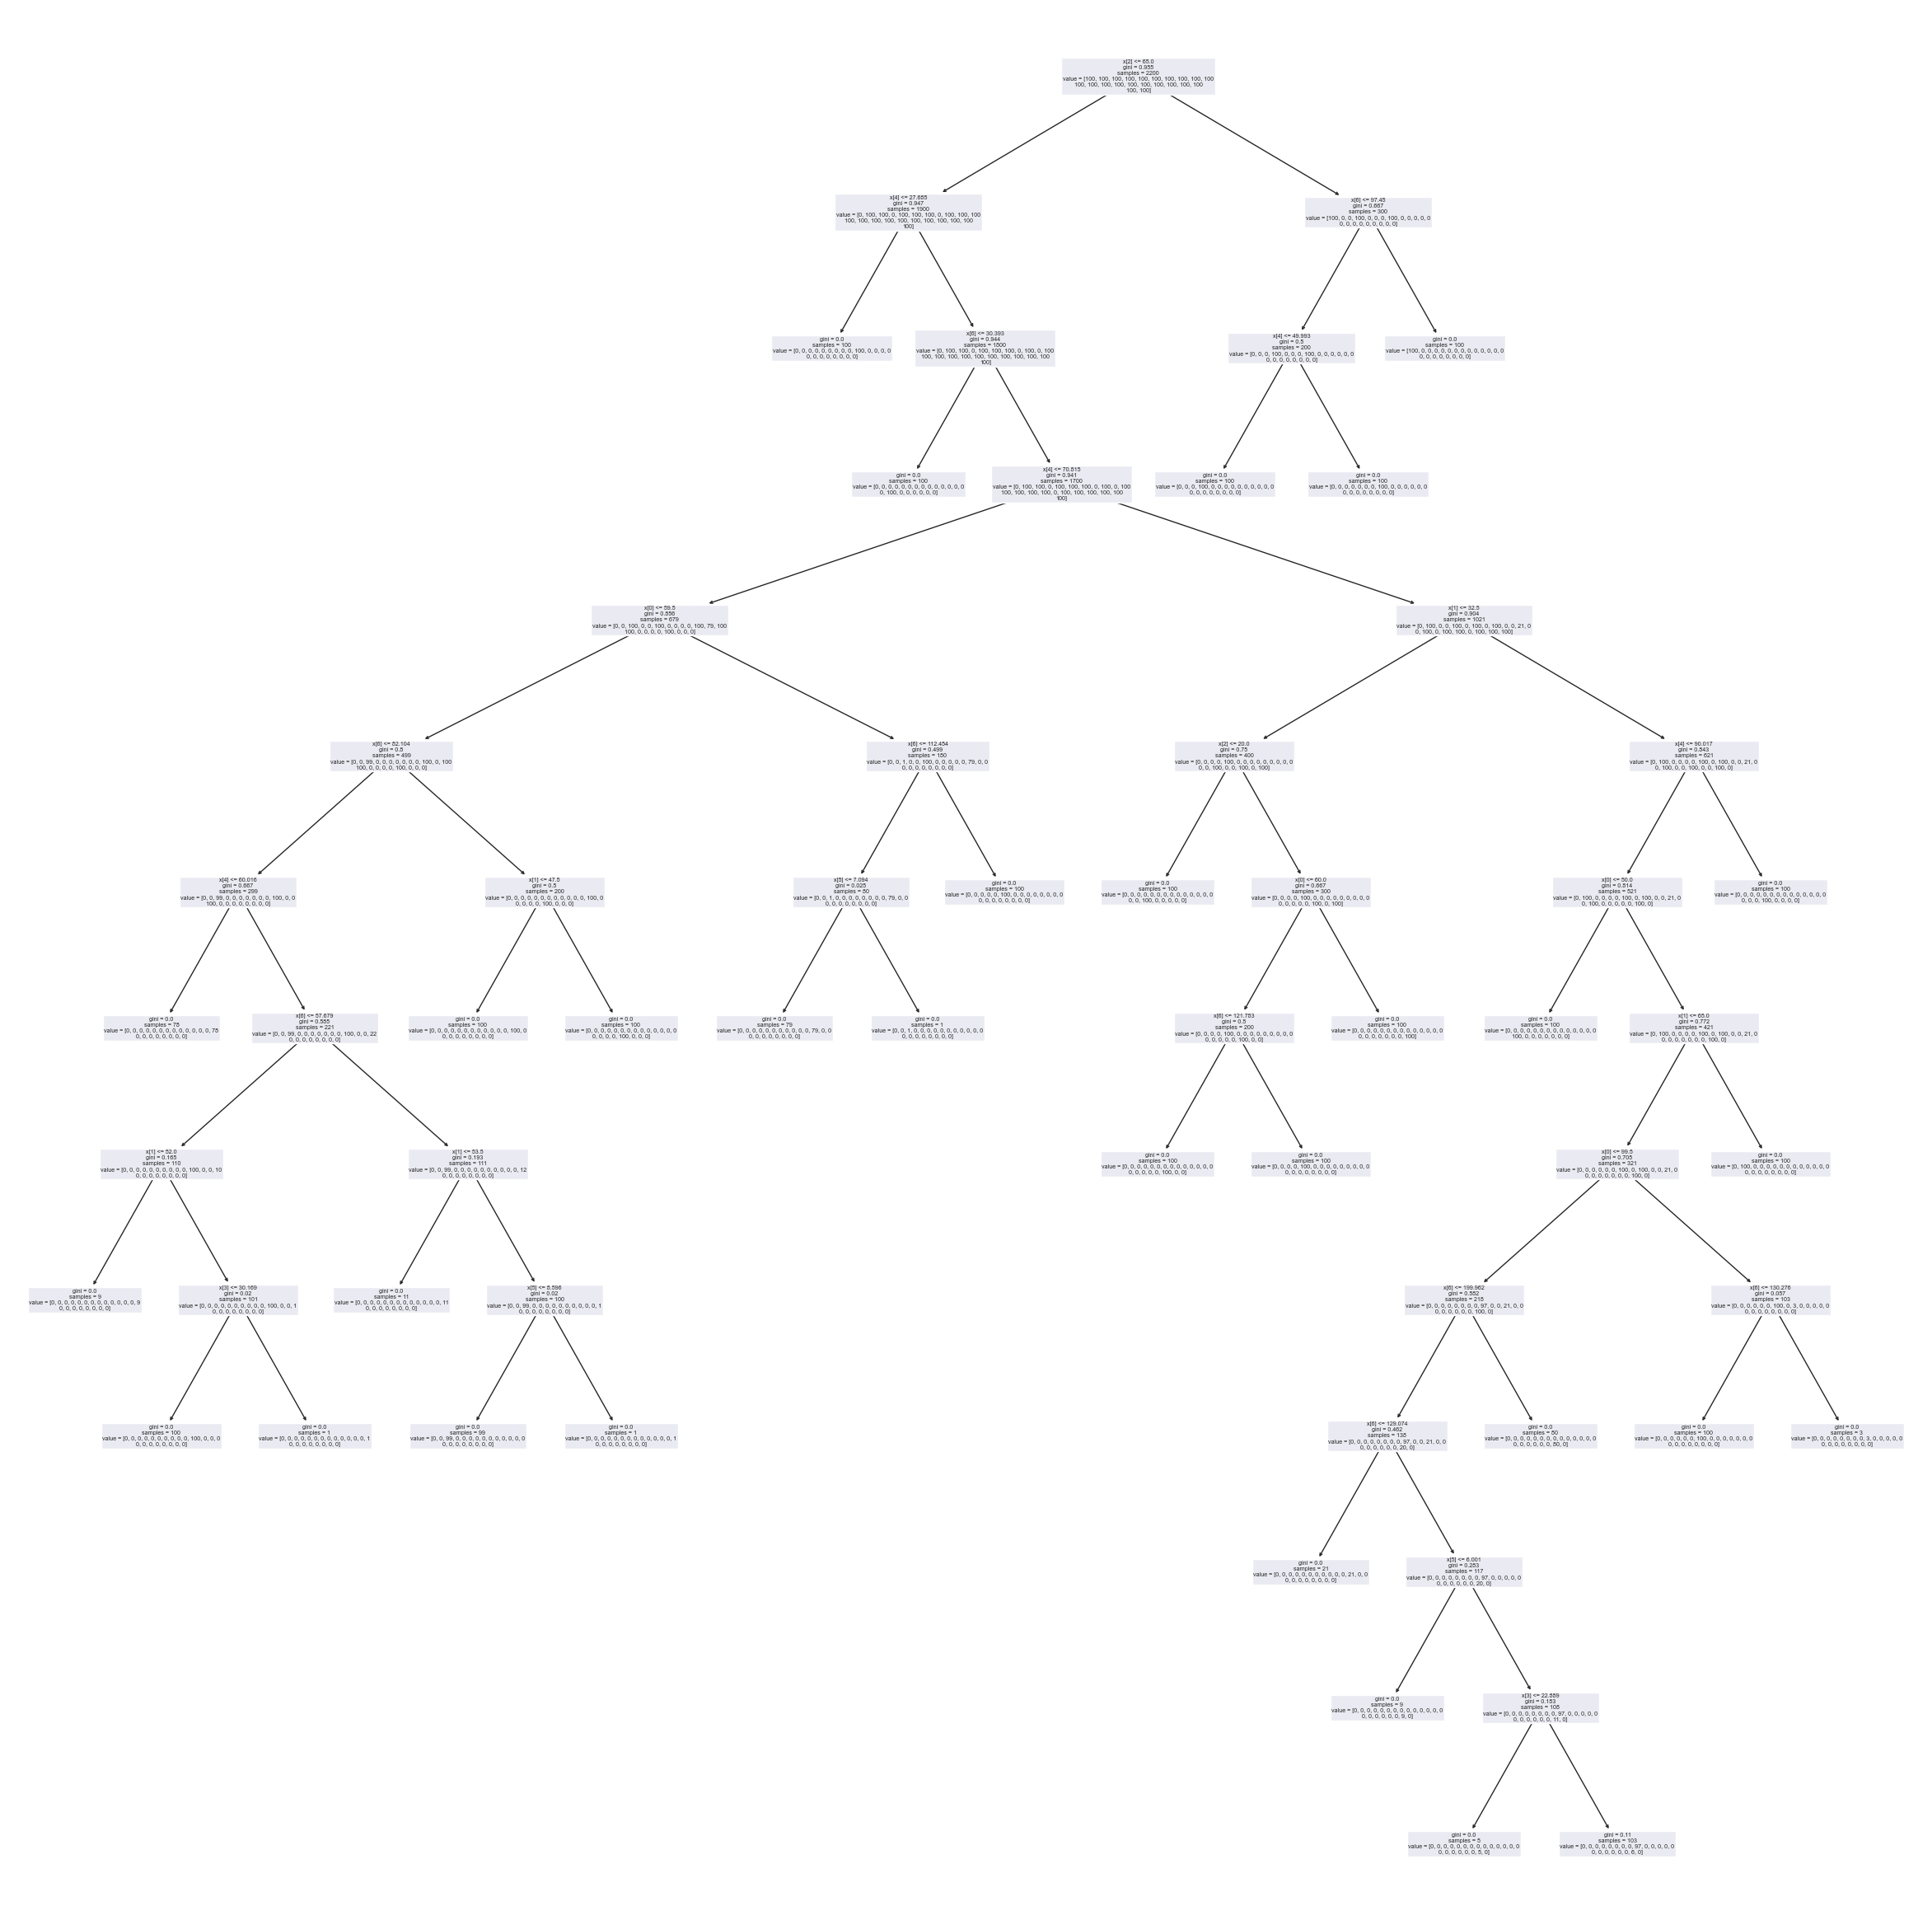

In [45]:
plt.figure(figsize=(30, 30))
plot_tree(dtc_v2)
plt.show()

#### 4.2.5 Create Classification Report

In [46]:
dtc_cr_v2 = classification_report(y_test, y_pred, digits=4)

#### 4.2.6 DTC (Fine Tuned) Confusion Matrix

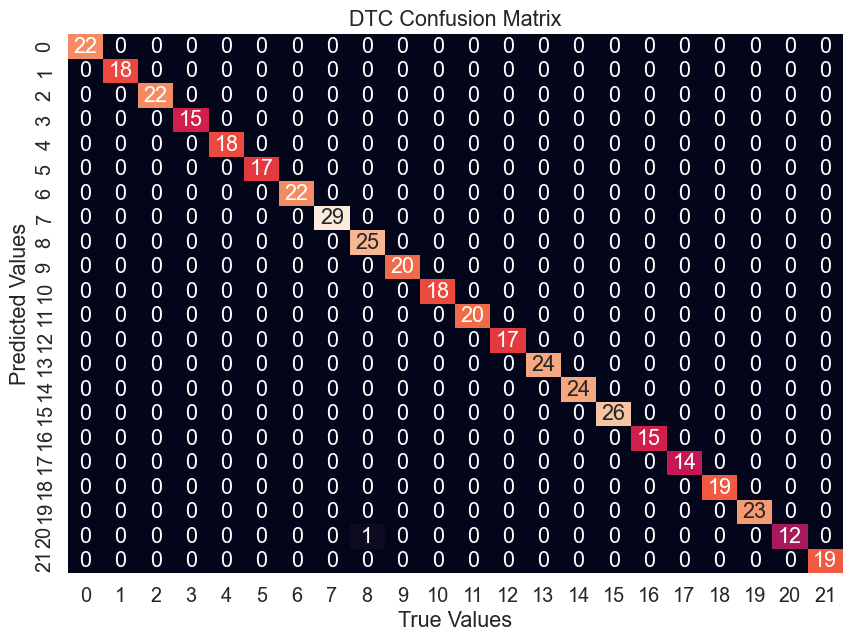

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
dtc_conf_matrix = classification_report(y_test,y_pred, digits=4)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("DTC Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

### 4.3 Logistic Regression Classifier

#### 4.3.1 Finding Best LR Solver

In [48]:
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga'] #these solves are suitable for multi class

for s in solvers:
    lr = LogisticRegression(penalty=None, verbose=True, n_jobs=-1, random_state=1, max_iter=10000, solver=s)
    score = cross_val_score(lr, X, y, cv=10)
    print(str(s)+ ' ' + str(np.mean(score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

newton-cg 0.9777272727272728


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   29.2s finished
[Parallel(n_jobs=-1)]: Using backend Loky

lbfgs 0.9718181818181817


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend Loky

sag 0.9681818181818181


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished
[Parallel(n_jobs=-1)]: Using backend Loky

saga 0.9668181818181818


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


#### 4.3.2 Load and Train Fine Tuned DTC

In [49]:
lr_v2 = LogisticRegression(penalty=None, verbose=True, n_jobs=-1, random_state=1, max_iter=10000, solver='newton-cg')
startTime = time.time()
lr_v2.fit(X,y)
timers.append(["LR Fine-Tuned: ", time.time()-startTime])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.5s finished


#### 4.3.3 Test Predictions

In [50]:
y_pred = lr_v2.predict(X_test)

#### 4.3.4 Create Classification Report

In [51]:
lr_cr_v2 = classification_report(y_test, y_pred, digits=4)

#### 4.3.7 LR (Fine Tuned) Confusion Matrix

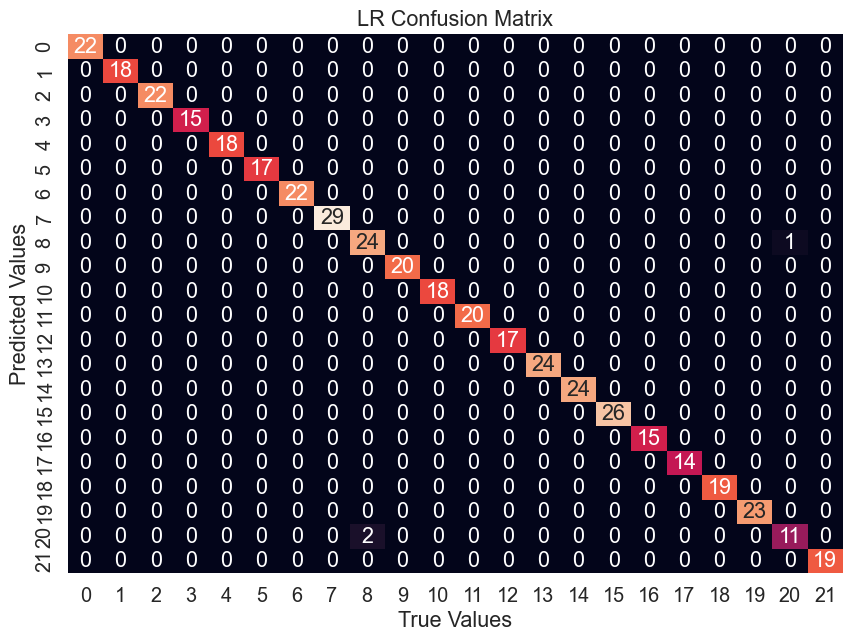

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix)
lr_conf_matrix = classification_report(y_test,y_pred, digits=4)

plt.figure(figsize=(10,7))
sns.set(font_scale=1.3)
sns.heatmap(conf_matrix_df, cbar=False, annot=True, fmt=".0f")
plt.title("LR Confusion Matrix")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# 5. Comparison of Fine Tuned Machine Learning Models

#### 5.1 Using SkLearn's Classifier Report

In [53]:
print("KNN")
print(knn_cr_v2)
print("DTC")
print(dtc_cr_v2)
print("LR")
print(lr_cr_v2)

KNN
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        22
      banana     1.0000    1.0000    1.0000        18
   blackgram     0.9565    1.0000    0.9778        22
    chickpea     1.0000    1.0000    1.0000        15
     coconut     1.0000    1.0000    1.0000        18
      coffee     1.0000    1.0000    1.0000        17
      cotton     0.9565    1.0000    0.9778        22
      grapes     1.0000    1.0000    1.0000        29
        jute     0.9200    0.9200    0.9200        25
 kidneybeans     0.9524    1.0000    0.9756        20
      lentil     1.0000    1.0000    1.0000        18
       maize     1.0000    0.9500    0.9744        20
       mango     1.0000    1.0000    1.0000        17
   mothbeans     1.0000    0.9583    0.9787        24
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.0000        26
      orange     1.0000    1.0000    1.0000        15
      papaya     1.0000

#### 5.2 Using Confusion Matrix

In [54]:
print("KNN Confusion Matrix")
print(knn_conf_matrix)
print("DTC Confusion Matrix")
print(dtc_conf_matrix)
print("LR Confusion Matrix")
print(lr_conf_matrix)

KNN Confusion Matrix
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        22
      banana     1.0000    1.0000    1.0000        18
   blackgram     0.9565    1.0000    0.9778        22
    chickpea     1.0000    1.0000    1.0000        15
     coconut     1.0000    1.0000    1.0000        18
      coffee     1.0000    1.0000    1.0000        17
      cotton     0.9565    1.0000    0.9778        22
      grapes     1.0000    1.0000    1.0000        29
        jute     0.9200    0.9200    0.9200        25
 kidneybeans     0.9524    1.0000    0.9756        20
      lentil     1.0000    1.0000    1.0000        18
       maize     1.0000    0.9500    0.9744        20
       mango     1.0000    1.0000    1.0000        17
   mothbeans     1.0000    0.9583    0.9787        24
    mungbean     1.0000    1.0000    1.0000        24
   muskmelon     1.0000    1.0000    1.0000        26
      orange     1.0000    1.0000    1.0000        15
      

#### 5.3 Using K-Folds Cross Validation comparision for ML Algorithms (Tuned params)

In [55]:
#Best parameters based from hyperparameter tuning
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier(max_depth=13)
lr_model = LogisticRegression(penalty=None, verbose=True, max_iter=10000, n_jobs=-1, solver='newton-cg')

# kf will return list of indices for the train_index and test_index
kfold_results = []
for i, (train_index, test_index) in enumerate(kf.split(crops_df)):
    axis = 0 
    # Extract from the dataframe based on the given indeces
    training_set = np.take(X, train_index, axis)
    training_set_labels = np.take(y, train_index, axis)
    test_set = np.take(X, test_index, axis)
    test_set_labels = np.take(y, test_index, axis)

    knn.fit(training_set,training_set_labels)
    knn_pred = knn.predict(test_set)
    knn_accuracy = round(accuracy_score(test_set_labels, knn_pred),4)
    
    dtc.fit(training_set,training_set_labels)
    dtc_pred = dtc.predict(test_set)
    dtc_accuracy = round(accuracy_score(test_set_labels, dtc_pred),4)
    
    lr_model.fit(training_set,training_set_labels)
    lr_pred = lr_model.predict(test_set)
    lr_accuracy = round(accuracy_score(test_set_labels, lr_pred),4)                
    
    kfold_results.append([i, knn_accuracy, dtc_accuracy, lr_accuracy])

print("============================")
print("Fold  |  KNN  |  DTC |  LR  ")
print("============================")
for k in kfold_results:
    print((str)(k[0]).center(5),"|",(str)(k[1].round(4)).ljust(5),"|",(str)(k[2].round(4)).ljust(5),"|",(str)(k[3].round(4)).ljust(5))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   14.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   13.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

Fold  |  KNN  |  DTC |  LR  
  0   | 0.9864 | 0.9864 | 0.9773
  1   | 0.9773 | 0.9955 | 0.9818
  2   | 0.9864 | 0.9955 | 0.9864
  3   | 0.9818 | 0.9864 | 0.9682
  4   | 0.9773 | 0.9773 | 0.9727
  5   | 0.9818 | 0.9955 | 0.9727
  6   | 0.9955 | 0.9955 | 0.9909
  7   | 0.9682 | 0.9818 | 0.9818
  8   | 0.9773 | 0.9955 | 0.9955
  9   | 0.9773 | 0.9955 | 0.9818


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.5s finished


## 6. Speed

In [56]:
for t in timers:
    print(t)

['KNN Default: ', 0.0045359134674072266]
['DTC Default: ', 0.014513731002807617]
['LR Default: ', 20.213172435760498]
['KNN Fine-Tuned: ', 0.0030155181884765625]
['DTC Fine-Tuned: ', 0.015108108520507812]
['LR Fine-Tuned: ', 16.56161618232727]
